Nama  : Putri Andriyani

##Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('dark_background')

##Load Dataset

In [ ]:
# Masukkan dataset-dataset anda kedalam program
from google.colab import files
uploaded = files.upload()

Saving Harga_Rumah.xlsx to Harga_Rumah (2).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Harga_Rumah.xlsx']))
# Dataset is now stored in a Pandas Dataframe
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


##Data Prepocessing

In [ ]:
# Cek tipe data pada setiap kolom
print("Tipe data pada setiap kolom:")
df.info()

Tipe data pada setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [ ]:
#menghapus beberapa kolom
df = df.drop(['LB', 'JKM', 'GRS','KOTA'], axis=1)

In [ ]:
df.info() #kolom-kolom setelah dihapus sebagian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1001 non-null   int64
 1   LT      1001 non-null   int64
 2   JKT     1001 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
# mengecek baris yang terdapat kolom kosong
print("Data sebelum dihapus nilai null:")
print(df.isnull().sum()) # jumlah nilai null pada setiap kolom

Data sebelum dihapus nilai null:
HARGA    0
LT       0
JKT      0
dtype: int64


In [ ]:
# mengecek data duplikat/tidak
print("Data sebelum dihapus nilai duplikat:")
print(df.duplicated().sum()) # jumlah data duplikat

Data sebelum dihapus nilai duplikat:
127


In [ ]:
df = df.drop_duplicates(subset=['HARGA', 'LT', 'JKT'], keep='first')

In [ ]:
# mengecek data duplikat/tidak
print("Data setelah dihapus nilai duplikat:")
print(df.duplicated().sum()) # jumlah data duplikat

Data setelah dihapus nilai duplikat:
0


In [ ]:
df

,HARGA,LT,JKT
0,28000000000,1100,5
1,19000000000,824,4
2,4700000000,500,4
3,4900000000,251,5
4,28000000000,1340,4
...,...,...,...
996,16000000000,488,6
997,4500000000,209,4
998,29000000000,692,4
999,1700000000,102,4


In [ ]:
#cek data KT berada di range yang masuk akal (tidak negatif)
outlier = df[(df['JKT'] < 0)]['JKT']
print('Outlier values:')
print(outlier)

Outlier values:
Series([], Name: JKT, dtype: int64)


In [ ]:
descriptive_stats = df[['HARGA', 'LT', 'JKT']].describe() # Menggunakan metode describe() untuk mendapatkan statistik deskriptif dari kolom-kolom yang relevan
Q1 = descriptive_stats.loc['25%'] # Menghitung batas atas dan batas bawah untuk menentukan outlier menggunakan metode interquartile range (IQR)
Q3 = descriptive_stats.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[                              # Mengidentifikasi outlier dalam setiap kolom dengan membandingkan nilainya dengan batas atas dan batas bawah yang dihitung sebelumnya
    (df['HARGA'] < lower_bound['HARGA']) |
    (df['HARGA'] > upper_bound['HARGA']) |
    (df['LT'] < lower_bound['LT']) |
    (df['LT'] > upper_bound['LT']) |
    (df['JKT'] < lower_bound['JKT']) |
    (df['JKT'] > upper_bound['JKT'])
]

In [ ]:
print(outliers) # Menampilkan outlier yang teridentifikasi

           HARGA    LT  JKT
9      480000000    66    2
11    4200000000   109    2
22   40000000000  1500    4
31   68000000000   470    5
33   85000000000   770    4
..           ...   ...  ...
975  20000000000   292   27
976  77500000000  1148    8
982   6750000000   200    2
988  85000000000  1180    5
989  65000000000   472    5

[134 rows x 3 columns]


Data-data teridentifikasi di atas saya putuskan untuk tetap saya ikutkan untuk analisis dan perhitungan ke depannya. Alasan saya tidak menghapus kolom tersebut adalah karena meskipun kolom tersebut adalah nilai yang outlier namun merupakan data yang masuk akal.

In [ ]:
df.describe()

,HARGA,LT,JKT
count,8.740000e+02,874.000000,874.000000
mean,1.763365e+10,538.526316,4.491991
std,2.178183e+10,556.316887,2.116440
min,4.300000e+08,22.000000,1.000000
25%,6.500000e+09,214.250000,4.000000
50%,1.294500e+10,400.000000,4.000000
75%,2.000000e+10,690.250000,5.000000
max,2.500000e+11,6790.000000,27.000000


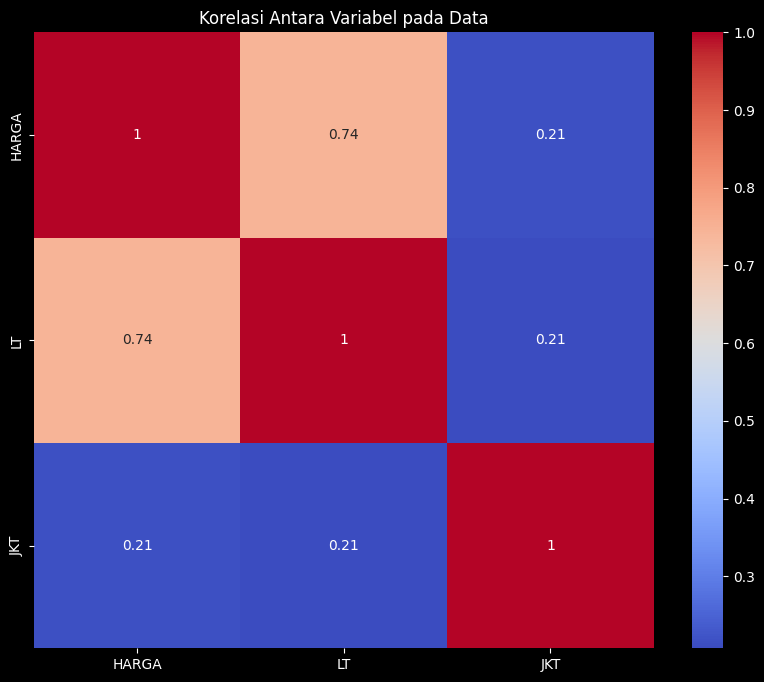

In [ ]:
# Menghitung matriks korelasi antara seluruh variabel numerik pada data
corr_matrix = df.corr()

# Menampilkan heatmap korelasi menggunakan Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Variabel pada Data')
plt.show()

Angka-angka dalam kotak pada heatmap menunjukkan nilai korelasi antara dua variabel yang dihubungkan oleh kotak tersebut. Nilai korelasi dapat berkisar antara -1 hingga 1, di mana nilai -1 menunjukkan korelasi yang sempurna berbanding terbalik, nilai 0 menunjukkan tidak adanya korelasi, dan nilai 1 menunjukkan korelasi yang sempurna searah.

Semakin dekat nilai korelasi dengan -1 atau 1, maka semakin kuat hubungan antara dua variabel tersebut. Sebaliknya, semakin dekat nilai korelasi dengan 0, maka semakin lemah atau tidak ada hubungan antara dua variabel tersebut.

Selain itu, warna kotak pada heatmap juga menunjukkan kekuatan korelasi antara dua variabel, di mana warna merah menunjukkan korelasi positif yang kuat, warna biru menunjukkan korelasi negatif yang kuat, dan warna putih menunjukkan korelasi yang lemah atau tidak ada korelasi.

Dari Heatmap kita dapat mengambil kesimpulan:
Antara LT dengan HARGA (variabel dependen); nilainya 0.74 (mendekati 1) yang artinya adalah korelasi hampir sempurna searah yang artinya semakin tinggi LT maka semakin tinggi pula HARGA.

Dari hasil analisis di atas, kita dapat menarik beberapa kesimpulan, di antaranya:

* Sebaran setiap kolom dapat dilihat dari deskripsi statistik. Kita dapat mengetahui nilai rata-rata, nilai median, dan rentang dari setiap kolom.
* Ada beberapa kolom yang memiliki korelasi yang kuat, seperti kolom LT dengan HARGA. Hal ini dapat dilihat dari heatmap korelasi.
* Terlihat bahwa semakin besar LT, semakin tinggi jumlah HARGA. Hal ini menunjukkan adanya hubungan positif antara kedua variabel tersebut.
* Korelasi antara kolom JKT dan HARGA cukup kuat (nilai korelasi sebesar 0.21). Hal ini menunjukkan adanya hubungan positif antara kedua variabel tersebut.
Kesimpulan tersebut dapat membantu kita dalam memahami data yang digunakan dan memilih variabel yang tepat untuk digunakan sebagai input dalam model prediksi.

##Model Testing

In [ ]:
# mengambil kolom harga dan jumlah kamar tidur serta Luas tanah pada data frame
X = df[['LT', 'JKT']]
y = df['HARGA']


# menampilkan X dan y
print('Variabel Independen (X):')
print(X)
print('Variabel Dependen (y):')
print(y)

Variabel Independen (X):
        LT  JKT
0     1100    5
1      824    4
2      500    4
3      251    5
4     1340    4
...    ...  ...
996    488    6
997    209    4
998    692    4
999    102    4
1000    63    3

[874 rows x 2 columns]
Variabel Dependen (y):
0       28000000000
1       19000000000
2        4700000000
3        4900000000
4       28000000000
           ...     
996     16000000000
997      4500000000
998     29000000000
999      1700000000
1000     1250000000
Name: HARGA, Length: 874, dtype: int64


Membangun model Regresi Linear pada data Harga_Rumah dengan menggunakan library Scikit-Learn dengan model Train Test Split;

Variabel independen (X) yang digunakan adalah LT dan JKT dan variabel dependen (y) yang digunakan adalah HARGA. Dataset kemudian dibagi menjadi data latih dan data uji menggunakan method train_test_split() dari Scikit-Learn dengan rasio data uji sebesar 20%. Selanjutnya, model Regresi Linear. Setelah itu, model digunakan untuk melakukan prediksi pada data uji menggunakan method predict(). Performa model kemudian dievaluasi dengan menghitung R2 Score menggunakan method r2_score() dari Scikit-Learn.

In [ ]:
from sklearn.metrics import r2_score
# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# melatih model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# memprediksi harga rumah menggunakan data uji
y_pred = regressor.predict(X_test)

# evaluasi performa model
score = r2_score(y_test, y_pred)

print(f'Skor R2: {score}')

Skor R2: 0.6398228156856696


Skor R2 (juga dikenal sebagai koefisien determinasi) adalah metrik yang umum digunakan untuk mengevaluasi performa model regresi.

Skor R2 mengukur proporsi variasi variabel target (y) yang dapat dijelaskan oleh variabel independen (X) dalam model. Skor 1 menunjukkan kesesuaian yang sempurna, sementara skor 0 menunjukkan bahwa model tidak menjelaskan variasi dalam variabel target. Skor negatif menunjukkan bahwa model lebih buruk daripada hanya memprediksi nilai rata-rata variabel target.

Di atas nilai Skor R2 = 0.639, bisa kita katakan skor lebih mendekati ke angka 1, yang artinya hampir menunjukkan kesesuaian sempurna.

Sehingga bisa langsung kita buat modelnya.

Karena Skor R2 cukup baik, saya akan menggunakannya untuk memprediksi harga rumah.

In [ ]:
# Pilih fitur yang akan digunakan sebagai variabel independen (X) dan variabel dependen (y)
X = df[['LT', 'JKT']]
y = df['HARGA']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Linear
model = LinearRegression()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Buat prediksi menggunakan data uji
y_pred = model.predict(X_test)
print("Hasil Prediksi:", y_pred)

Hasil Prediksi: [1.58036547e+10 1.16114572e+10 6.52647108e+10 1.16695075e+10
 4.74247375e+09 1.30376426e+10 1.52682975e+10 3.20456905e+10
 5.84149636e+09 7.53679414e+09 1.69650291e+10 1.97296075e+10
 2.79695936e+10 1.37217101e+10 1.18493937e+10 2.36272520e+10
 1.05407428e+10 1.67554008e+10 1.90752820e+10 2.15141314e+10
 4.67934539e+10 4.82167715e+10 4.69704724e+10 1.23847509e+10
 1.75598704e+10 1.06299690e+10 7.44756794e+09 4.17594066e+09
 5.96046463e+09 3.01393306e+10 1.17870419e+10 1.60924724e+10
 2.04122411e+10 1.30985605e+10 2.16062253e+10 7.98292513e+09
 1.20844626e+10 3.07835187e+09 7.65576240e+09 5.45278249e+10
 2.61836358e+10 7.21106524e+09 2.08881142e+10 3.98889930e+10
 8.33982993e+09 1.56846864e+10 2.66052911e+09 4.38556895e+09
 1.45856638e+10 4.01624069e+10 2.20806645e+10 6.52699772e+09
 7.06235491e+09 6.55530595e+09 4.88975025e+09 8.04240926e+09
 8.01266720e+09 1.01243539e+10 2.36272520e+10 1.22360406e+10
 1.30985605e+10 1.29767246e+10 2.30362432e+09 8.66699265e+09
 2.11289

Di atas ini adalah hasil prediksi harga-harga rumah.

Dan misal saya ingin membuat prediksi harga rumah dengan LT (luas tanah) dan JKT (jumlah kamar tidur) yang saya sesuaikan manual. Misal prediksi harga rumah yang muncul untuk luas tanah sebasar 500 m^2 dan jumlah kamar tidur sebanyak 4.

In [ ]:
# melakukan prediksi pada data baru
X_new = pd.DataFrame({'LT': [500], 'JKT': [4]})
y_pred = model.predict(X_new)
print(y_pred)

[1.60727671e+10]


Prediksi harga rumah yang muncul ialah 1.6213526e+10 atau sama dengan  16.213.526.000 alias sekitar 16 milyar.

Jika kita perhatikan dari data-data yang ada di atas tadi, hasil prediksi ini dapat dikatakan lumayan sesuai dan masuk akal.